### Procesamiento Imagen

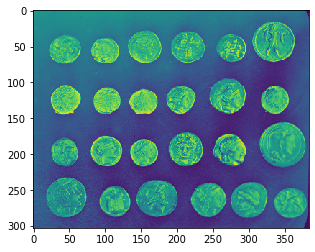

In [1]:
from skimage import data
import matplotlib.pyplot as plt
coins=data.coins()
plt.imshow(coins)

In [2]:
def mostrar_imagen(imagen):
    fig,ax=plt.subplots(figsize=[7,7])
    ax.imshow(imagen,cmap='gray')
    plt.show()

(1201, 1300)

numpy.ndarray

1.0

0.0025

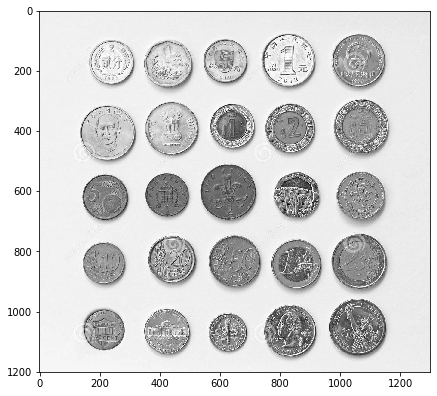

In [3]:
import skimage.io as io
import numpy as np
from skimage.color import rgb2gray
monedas = io.imread(fname="images/monedas.jpg")
monedas = rgb2gray(monedas)
display(monedas.shape)
display(type(monedas))
display(np.max(monedas))
display(np.min(monedas))
mostrar_imagen(monedas)

In [4]:
arr=np.arange(16).reshape(4,4)
display(arr)
display(np.max(arr,axis=0))
display(np.max(arr,axis=1))

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11],
       [12, 13, 14, 15]])

array([12, 13, 14, 15])

array([ 3,  7, 11, 15])

In [5]:
arr_img_col=np.mean(monedas,axis=0)
arr_img_row=np.mean(monedas,axis=1)
display(arr_img_col)
display(arr_img_row)

array([0.94834657, 0.94836304, 0.94846985, ..., 0.91708324, 0.91702773,
       0.91702446])

array([0.91833843, 0.91832203, 0.91851973, ..., 0.94799659, 0.9480371 ,
       0.94353433])

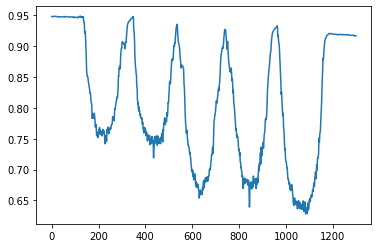

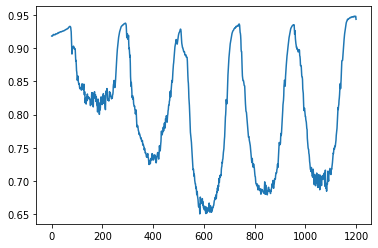

In [6]:
plt.plot(arr_img_col)
plt.show()
plt.plot(arr_img_row)
plt.show()

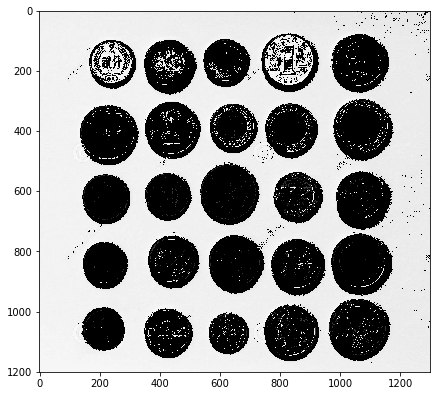

In [7]:
image_nueva=monedas.copy()
image_nueva[(image_nueva>0.25)&(image_nueva<0.90)]=0
mostrar_imagen(image_nueva)

#image_nueva[>0.65,:] = 0
#image_nueva[>0.75 ] = 0

In [8]:
arr=np.arange(10).reshape(2,5)
display(arr)
display(arr[0,:])
display(arr[1,:])
display(arr[:,0])
display(arr[:,1])

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

array([0, 1, 2, 3, 4])

array([5, 6, 7, 8, 9])

array([0, 5])

array([1, 6])